In [1]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install opencv-python-headless==4.1.2.30
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-z1nk0nm0
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-z1nk0nm0
     |████████████████████████████████| 48.3 MB 1.2 MB/s 
  Created wheel for albumentations: filename=albumentations-1.2.0-py3-none-any.whl size=113560 sha256=b3c0441fd2edcadab4568262be486cf0eaaaf4d0e896e99e428a51e25752b806
  Stored in directory: /tmp/pip-ephem-wheel-cache-qjjqenlj/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.3 

In [2]:
#Data from kaggle so installing kaggle
!pip install -q kaggle

from google.colab import files
#Upload kaggle.json file which holds key to use kaggle api
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

#Changing permissions so only user has full rw access
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
#Need to create directory where we download data and extract it in
import os
data_path = "data"

#Check if directory exists, if not create and download data.
if os.path.isdir(data_path):
  print("Data already downloaded")

else:
  #Making path
  os.mkdir(data_path)
  #Downloading data from kaggle
  !kaggle datasets download andrewmvd/car-plate-detection -p data --unzip

  #Unzip data
  print("Downloaded Successfully!")

 98% 200M/203M [00:01<00:00, 187MB/s]
100% 203M/203M [00:01<00:00, 175MB/s]
Downloaded Successfully!


In [4]:
import xml.etree.ElementTree as et
import numpy as np

In [5]:
#For dealing with xml files, we'll use the xml python library
def xml_info(path):
  #get path to xml file
  #path = "data/annotations/Cars0.xml"
  #get tree representation
  xml_rep = et.parse(path)
  root = xml_rep.getroot()
  #print(et.tostring(root))

  #folder
  folder = root[0].text
  filename = root[1].text
  #print(folder)
  #print(filename)

  #Size
  width = int(root[2][0].text)
  height = int(root[2][1].text)
  depth = int(root[2][2].text)
  #print(f"Size  :  width: {width}, height:{height}, depth:{depth}")

  #Bbox
  xmin = int(root[4][5][0].text)
  ymin = int(root[4][5][1].text)
  xmax = int(root[4][5][2].text)
  ymax = int(root[4][5][3].text)
  #print(f"Bbox  :  xmin: {xmin}, ymin:{ymin}, xmax:{xmax}, ymax:{ymax}")

  return {"folder":folder,
          "filename":filename,
          "width":width,
          "height":height,
          "depth":depth,
          #"bboxes":np.array([[xmin,ymin,xmax,ymax]],dtype=np.float32).reshape((4,)),
          "bboxes":{"xmin":xmin,"ymin":ymin,"xmax":xmax,"ymax":ymax},
          "xmin":xmin,
          "ymin":ymin,
          "xmax":xmax,
          "ymax":ymax}

In [6]:
#looping through annotations
from glob import glob
import pandas as pd


annotations = "data/annotations/*.xml"
#imgs_path = "data/images/*.png"
items = glob(annotations)
#imgs = glob(imgs_path)

data = []
#looping through annotations
for annot in items:
  res = xml_info(annot)
  data.append(res)

#Creating dataframe from data
df = pd.DataFrame(data)
df.head()

folder     filename  width  height  depth  \
0  images  Cars226.png    400     267      3   
1  images  Cars308.png    400     300      3   
2  images   Cars42.png    400     225      3   
3  images  Cars216.png    530     398      3   
4  images   Cars88.png    400     300      3   

                                              bboxes  xmin  ymin  xmax  ymax  
0  {'xmin': 249, 'ymin': 194, 'xmax': 318, 'ymax'...   249   194   318   213  
1  {'xmin': 159, 'ymin': 221, 'xmax': 237, 'ymax'...   159   221   237   241  
2  {'xmin': 177, 'ymin': 140, 'xmax': 217, 'ymax'...   177   140   217   159  
3  {'xmin': 205, 'ymin': 214, 'xmax': 280, 'ymax'...   205   214   280   262  
4  {'xmin': 168, 'ymin': 148, 'xmax': 242, 'ymax'...   168   148   242   171

In [7]:
df.dtypes

folder      object
filename    object
width        int64
height       int64
depth        int64
bboxes      object
xmin         int64
ymin         int64
xmax         int64
ymax         int64
dtype: object

In [8]:
from PIL import Image,ImageDraw
import numpy as np

In [9]:
##Visualize image
def visualize(image,index=0):
  if type(image) == str:
    im = Image.open(image)
    #print("String")
    #im.show()

  elif type(image) is np.ndarray:
    im = Image.fromarray(image)

  else:
    #if df is passed
    root = "data/images/"
    path = root + image.iloc[index,1]
    xmin = image.loc[index,"xmin"]
    ymin = image.loc[index,"ymin"]
    xmax = image.loc[index,"xmax"]
    ymax = image.loc[index,"ymax"]
    #reading image
    im = Image.open(path)
    img1 = ImageDraw.Draw(im)
    img1.rectangle([(xmin,ymin),(xmax,ymax)],outline="green",width=2)


  return im

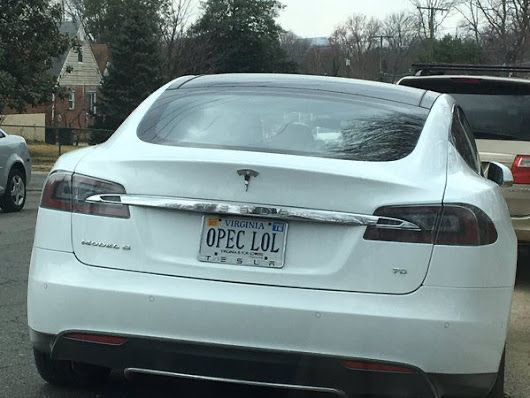

In [10]:
im = visualize("data/images/"+df.iloc[3,1])
im

In [11]:
#convert to csv
df_path = "data/lp_det.csv"
df.to_csv(df_path,index=False)

# **Data Preparation**

In [12]:
import os
import albumentations as A
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
#os.path.join("data/image","cars1.png")

In [13]:
#Have an adaptor class which handles the loading and augmentation of data
class Adaptor():
  def __init__(self,path,df,image_size):
    self.df = df
    self.IMAGE_HEIGHT = image_size[0]
    self.IMAGE_WIDTH = image_size[1]
    self.path = path

  def load_image(self,index):
    #pick image location from df
    #return image
    im_path = os.path.join(self.path,df.loc[index,"filename"])
    image = Image.open(im_path)
    #Image is png hence with 4 channels,convert to rgb
    image= image.convert("RGB")

    return image

  def load_bbox(self,index):
    #pick bbox location from df
    #return bbox
    bbox  = [df.loc[index,"bboxes"]]
    #print(f"Load bbox: {bbox}")
    bbox = pd.DataFrame(bbox)
    return bbox

  def load_data(self,index,train):
    #load image
    image = self.load_image(index)
    bbox = self.load_bbox(index)
    #print(f"BBox after augmenting {bbox}")
    #image = self.draw_bboxes(image,bbox)
    image = np.array(image)/255.0

    #perform augmentation
    image,bbox = self.augment_image(image,bbox,train=train)
    return image,bbox

  def draw_bboxes(self,image,bbox):
    img_draw = ImageDraw.Draw(image)
    img_draw.rectangle([bbox['xmin'],bbox['ymin'],bbox['xmax'],bbox['ymax']],outline="green",width=2)
    return np.array(image)
    

  def augment(self,train=True):
    if train:
      #training pipeline
      return A.Compose([
                    A.Resize(width = self.IMAGE_WIDTH,height=self.IMAGE_HEIGHT),
                    #A.Normalize(),
                    A.AdvancedBlur(p=0.2),
                    A.OneOf([
                             A.HorizontalFlip(p=0.5),
                             A.VerticalFlip(p=0.2)
                    ],p=0.5),
                    A.OneOf([
                             A.Sharpen(p=0.2),
                             A.MotionBlur(blur_limit=3,p=0.5)
                    ])
  ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=["labels"]))

    else:
      #validation pipeline
      return A.Compose([
                    A.Resize(width = self.IMAGE_WIDTH,height=self.IMAGE_HEIGHT)
                    #A.Normalize()
  ],bbox_params=A.BboxParams(format='pascal_voc',label_fields=["labels"]))
    

  def augment_image(self,image,bbox,train):
    #bboxes=[]
    transform = self.augment(train)

    #converting bbox to list
    bbox = (bbox.to_numpy()/255.0).tolist()
    #print(bbox)

    #Albumentation requires bboxes to be a list of list
    #bboxes.append(bbox)
    labels = np.ones(len(bbox))

    #Applying transformations
    transformed = transform(image=image,bboxes=bbox,labels=labels)
    image = transformed["image"]
    bbox = transformed["bboxes"]

    #transform to torch tensor

    return image,bbox

In [14]:
IMAGE_SIZE=(480,640)

In [15]:
from google.colab.patches import cv2_imshow

In [16]:
import matplotlib.pyplot as plt

In [17]:
from matplotlib.patches import Rectangle

[(0.07529411764705883, 0.6149019607843138, 2.415686274509804, 1.135686274509804)]


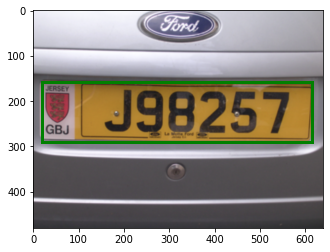

In [18]:
#Testing Adaptor Class
adpt = Adaptor(path ="data/images",df=df,image_size=(480,640))
img,bbox = adpt.load_data(8,False)
print(bbox)
#print(img)
#visualize((img).astype(np.uint8))
plt.imshow(img)

ax = plt.gca()
lst =bbox[0]
wdth = lst[2]*255-lst[0]*255
hght = lst[3]*255-lst[1]*255
rect = Rectangle((lst[0]*255,lst[1]*255),wdth,hght,linewidth=3,edgecolor='green',facecolor='none')
ax.add_patch(rect)

In [19]:
#img

**Dataset Class**

In [20]:
import torch
from torch.utils.data import Dataset,DataLoader

In [21]:
class LPData(Dataset):
  def __init__(self,adaptor,train=True):
    super(LPData,self).__init__
    self.adaptor =adaptor
    self.train= train


  def __len__(self):
    return len(self.adaptor.df)

  def __getitem__(self,index):
    image,bbox = self.adaptor.load_data(index,self.train)
    #image = image.astype(np.float32)

    #convert to tensor
    image = torch.from_numpy(image.transpose(2,0,1).astype(np.float32))
    bbox = torch.tensor(bbox)

    return {"image":image, "bbox":bbox}

**Test dataset**

In [22]:
import matplotlib.pyplot as plt

In [23]:
##test
testds = LPData(adaptor=Adaptor(path ="data/images",df=df,image_size=IMAGE_SIZE),train=True)

In [24]:
from google.colab.patches import cv2_imshow

tensor([[1.5624, 1.3677, 1.9953, 1.5017]], dtype=torch.float64)
torch.Size([3, 480, 640])


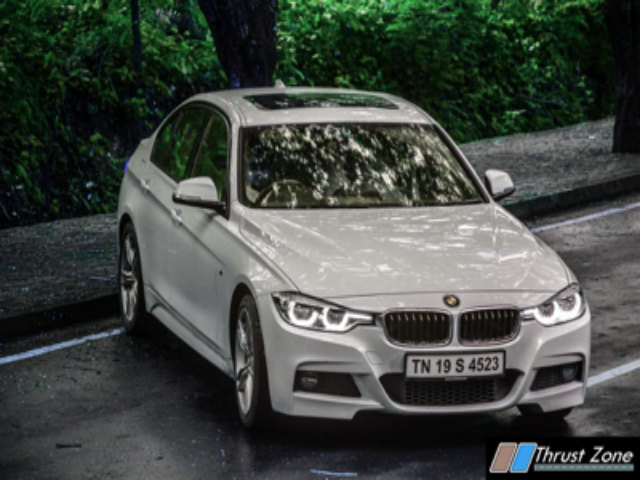

In [25]:
batch =next(iter(testds))
image,bbox = batch["image"],batch["bbox"]
print(bbox)
print(image.shape)

#plt.figure(figsize=(10,10))
#plt.axis('off')
#plt.imshow(image.permute(1,2,0))
cv2_imshow((image.numpy()*255.0).transpose(1,2,0))

In [26]:
import gc
del testds
gc.collect()

50

In [27]:
#visualize(image)

In [28]:
#function to generate train and val dataloaders
def train_val_dl(df,btch,val_btch,frac):
  train_idx = list(df.sample(frac=frac).index)
  val_idx = list(df.loc[df.index.difference(train_idx)].index)

  #Train and val dfs
  train_df = df.iloc[train_idx]
  val_df = df.iloc[val_idx]
    
  #Train and val datasets
  train_ds = LPData(adaptor=Adaptor(path ="data/images",df=train_df,image_size=IMAGE_SIZE),train=True)
  val_ds = LPData(adaptor=Adaptor(path ="data/images",df=val_df,image_size=IMAGE_SIZE),train=False)
    
  #Train and val dataloaders
  train_dl = DataLoader(train_ds,batch_size = btch)
  val_dl = DataLoader(val_ds,batch_size = val_btch)

  return train_dl,val_dl


# **Model Building**

In [29]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 30.3 MB/s 


In [30]:
import timm
import torch.nn as nn
import torch.optim as optim

In [31]:
MODEL = "efficientnet_b0"
#timm.list_models(pretrained=True)
#vgg16
#,global_pool='catavgmax'
#'resnetv2_50'
#"efficientnet_b0"

In [32]:
model = timm.create_model(MODEL,pretrained = True)
print(model.get_classifier())
#vgg16
#,global_pool='catavgmax'
#'resnetv2_50'
#"efficientnet_b0"

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b0_ra-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_ra-3dd342df.pth


Linear(in_features=1280, out_features=1000, bias=True)


In [33]:
model

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
   

In [34]:
#model.head.fc
#model.classifier

In [35]:
class LPModel(nn.Module):
  def __init__(self,model_name,out_classes,pre_trained=True):
    super(LPModel,self).__init__()
    self.model_name = model_name
    self.out_classes = out_classes

    self.model = timm.create_model(self.model_name,pretrained = pre_trained)

    #Freezing layers
    for layer in self.model.parameters():
      layer.require_grad = False

    #For VGG
    #in_features = self.model.get_classifier().in_features
    #self.model.head = nn.Sequential(
        #nn.Linear(in_features = in_features,out_features=512),
        #nn.Linear(in_features=512,out_features=128),
        #nn.Linear(in_features=128,out_features=out_classes),
        #nn.Sigmoid()
    #)

    self.model.reset_classifier(self.out_classes)


  def forward(self,x):
    x = self.model(x)
    x = nn.Sigmoid()(x)
    return x

  def check_fc(self):
    print(self.model.get_classifier())

In [36]:
model = LPModel(MODEL,4)
#resnet101
#efficientnet_b0

In [37]:
model

LPModel(
  (model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): SiLU(inplace=True)
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act1): SiLU(inplace=True)
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, tr

In [38]:
model.check_fc()

Linear(in_features=1280, out_features=4, bias=True)


In [39]:
#Testing model
x = torch.randn(1,3,480,640)
outs = model(x)
outs.shape

torch.Size([1, 4])

In [40]:
outs

tensor([[0.5013, 0.5283, 0.5130, 0.5040]], grad_fn=<SigmoidBackward0>)

In [41]:
import gc
del model
gc.collect()


108

In [42]:
from torchmetrics import JaccardIndex

In [43]:
def model_optim(model):
  optimizer = optim.Adam(model.parameters(),lr=0.01)

  #criterion = JaccardIndex(4)
  #Try mse loss
  criterion = nn.L1Loss()
  #criterion = nn.MSELoss()


  return optimizer,criterion

# **Training**

In [44]:
EPOCHS = 20
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [45]:
import tqdm
from tqdm.notebook import tqdm_notebook

In [46]:
def train():
  #Get train and val loaders
  train_dl,val_dl = train_val_dl(df,btch=20,val_btch=10,frac=0.8)

  #Create model
  model = LPModel(MODEL,4)
  model.to(DEVICE)

  #tmodel = LPModel("efficientnet_b0",4)

  #Get optimizer and criterion
  opt,crit = model_optim(model)

  #For train and val error
  train_loss = []
  val_loss = []

  tl = []
  vl = []

  for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")

    train_loss.clear()
    val_loss.clear()

    for batch in tqdm.tqdm(train_dl,desc="Training Batch:"):
      #Unpacking data
      images,bboxes = batch["image"],batch["bbox"]
      images = images.to(DEVICE)
      #.permute(0,3,1,2)
      bboxes = torch.reshape(bboxes.to(DEVICE),(-1,4))

      model.train()

      #zero out gradients
      opt.zero_grad()

      #forward pass
      out = model(images)

      #loss
      #print(out.shape)
      #print(bboxes.shape)
      loss = crit(out,bboxes.float())

      #back 
      loss.backward()
      #Update weights
      opt.step()

      train_loss.append(loss.cpu().detach().numpy())

    #train loss after one full pass
    avg_train_loss = np.sum(train_loss)
    tl.append(avg_train_loss)

    #validation pass
    model.eval()
    with torch.no_grad():
      for batch in tqdm.tqdm(val_dl,desc="Validation Batch:"):
        images,bboxes = batch["image"],batch["bbox"]
        images = images.to(DEVICE)
        bboxes = torch.reshape(bboxes.to(DEVICE),(-1,4))

        out = model(images)
        loss = crit(out,bboxes.float())

        val_loss.append(loss.cpu().detach().numpy())

    avg_val_loss = np.sum(val_loss)
    vl.append(avg_val_loss)

    print(f"Train loss: {avg_train_loss}    Val loss:{avg_val_loss}")

  return model,tl,vl

In [47]:
torch.cuda.empty_cache()

In [48]:
model,train_loss,val_loss = train()

Epoch 1/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.86it/s]


Train loss: 2532.147216796875    Val loss:3.3638672828674316
Epoch 2/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]


Train loss: 2739.98291015625    Val loss:3.3638672828674316
Epoch 3/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]


Train loss: 2376.216796875    Val loss:3.3638672828674316
Epoch 4/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]


Train loss: 2769.03662109375    Val loss:3.3638572692871094
Epoch 5/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]


Train loss: 2274.08154296875    Val loss:3.3638548851013184
Epoch 6/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]


Train loss: 2701.540771484375    Val loss:3.3638556003570557
Epoch 7/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]


Train loss: 2433.420654296875    Val loss:3.3638572692871094
Epoch 8/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]


Train loss: 2701.599365234375    Val loss:3.3638558387756348
Epoch 9/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]


Train loss: 2726.793701171875    Val loss:3.363858222961426
Epoch 10/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]


Train loss: 2612.460693359375    Val loss:3.3638570308685303
Epoch 11/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]


Train loss: 2512.773193359375    Val loss:3.3638622760772705
Epoch 12/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]


Train loss: 2516.650634765625    Val loss:3.3638601303100586
Epoch 13/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.83it/s]


Train loss: 2700.2890625    Val loss:3.3638672828674316
Epoch 14/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.79it/s]


Train loss: 2720.01904296875    Val loss:3.3638672828674316
Epoch 15/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]


Train loss: 2617.72802734375    Val loss:3.3638672828674316
Epoch 16/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]


Train loss: 2508.987548828125    Val loss:3.3638672828674316
Epoch 17/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.81it/s]


Train loss: 2644.48291015625    Val loss:3.3638672828674316
Epoch 18/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]


Train loss: 2553.00634765625    Val loss:3.3638672828674316
Epoch 19/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.88it/s]


Train loss: 2713.3935546875    Val loss:3.3638672828674316
Epoch 20/20


Validation Batch:: 100%|██████████| 9/9 [00:02<00:00,  3.84it/s]

Train loss: 2646.709228515625    Val loss:3.3638672828674316


In [49]:
gc.collect()

58

**Visualizing Training History**

In [50]:
history= {"Training-loss":train_loss,"Validation-loss":val_loss}

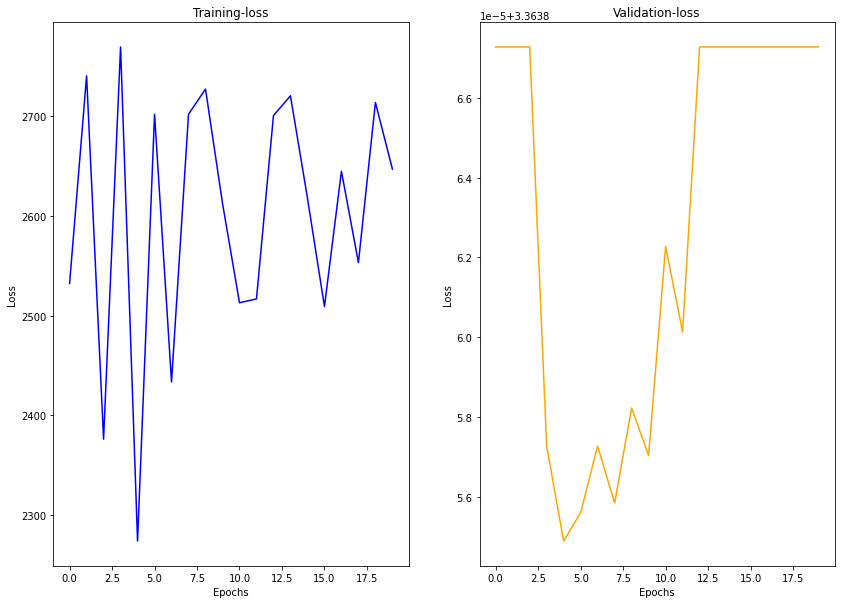

In [51]:
##using pyplots
from matplotlib.pyplot import figure
fig,axes = plt.subplots(1,2, figsize = (14,10),facecolor='w', edgecolor='k')

axes = axes.ravel()
i=0
for k,v in history.items():
  if i == 0:
    color = "blue"
  else:
    color = "orange"
  axes[i].plot(range(EPOCHS),v,color=color)
  axes[i].set_title(k)
  axes[i].set_xlabel("Epochs")
  axes[i].set_ylabel("Loss")
  i+=1


In [52]:
from google.colab import drive

In [ ]:
drive_pth = "drive"

if (os.path.isdir(drive_pth)):
  print("Drive path Created")

else:
  os.mkdir(drive_pth)

drive.mount(drive_pth)

In [ ]:
m_path = "drive/MyDrive/Road_segm/models"
if os.path.isdir(m_path):
  print("Directory exists")

else:
  os.mkdir(m_path)

In [ ]:
#Saving model
#Path
trained_model = "best_" + MODEL + ".pt"
torch.save({"epoch":EPOCHS,
            "model_state_dict":model.state_dict()},os.path.join(m_path,"best_" + MODEL + ".pt"))
print("Saved!")

# **Testing Model on Custom Image**

In [ ]:
#Uploading Image from local storage
#from google.colab import files
#files.upload()

In [ ]:
!mkdir data/test

In [ ]:
#!unzip testim.zip -d data/test
!unzip drive/MyDrive/Road_segm/cars.zip -d data/test

In [ ]:
#!unzip testim.zip -d data/test

Visualizing images

In [ ]:
#Loading
#im1 = Image.open("data/test/lpdet.png").convert("RGB")
#im2 = Image.open("data/test/rseg2.png").convert("RGB")
im3 = Image.open("data/test/car1.jpg")
im4 = Image.open("data/test/car2.jpg")
im5 = Image.open("data/test/car3.jpg")

In [ ]:
##Converting to a numpy array
#im1 = np.array(im1)
#im2 = np.array(im2)
im3 = np.array(im3)
im4 = np.array(im4)
im5 = np.array(im5)

In [ ]:
visualize(im3)

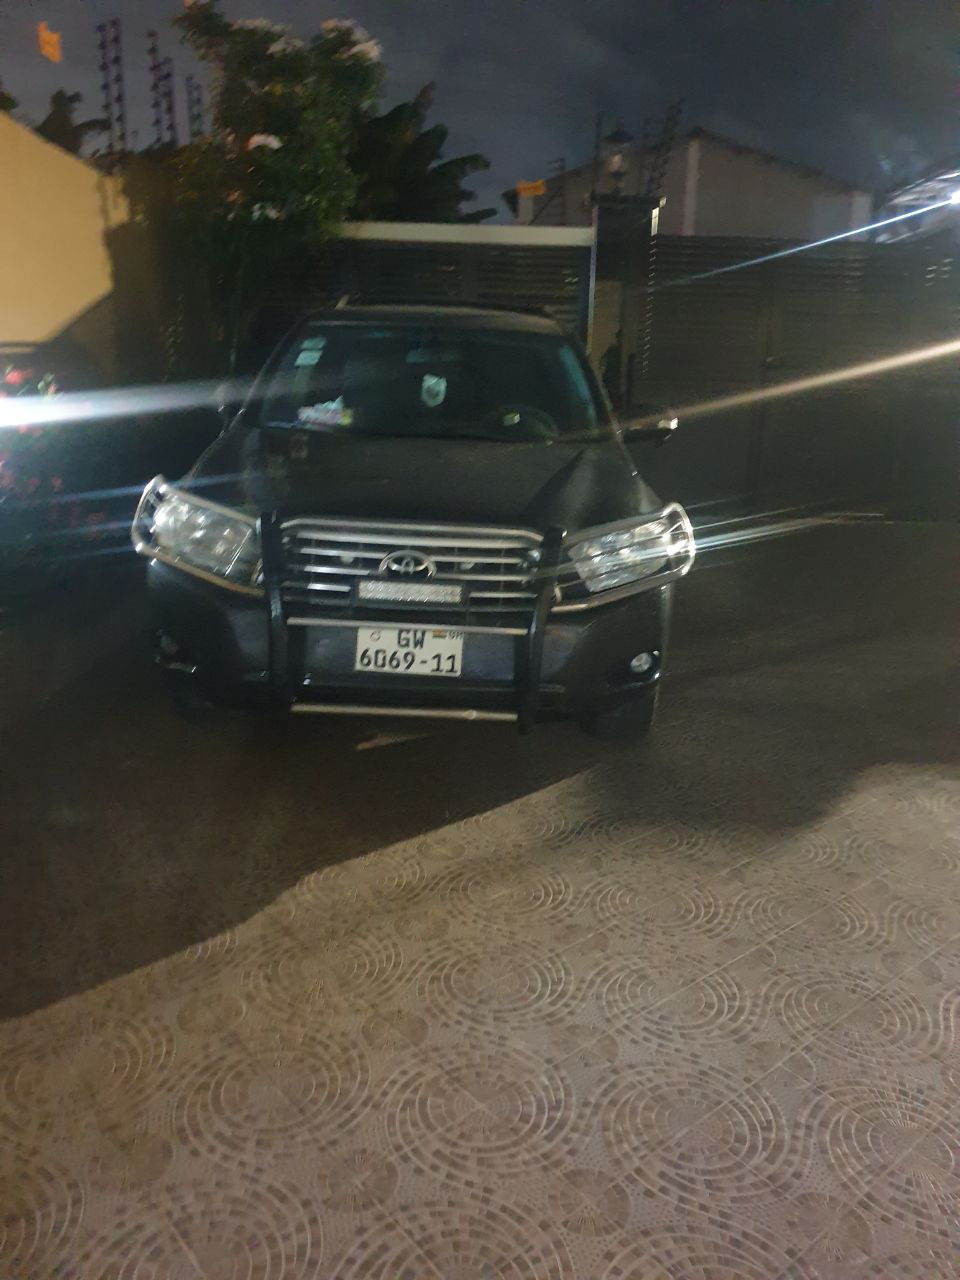

In [ ]:
visualize(im4)

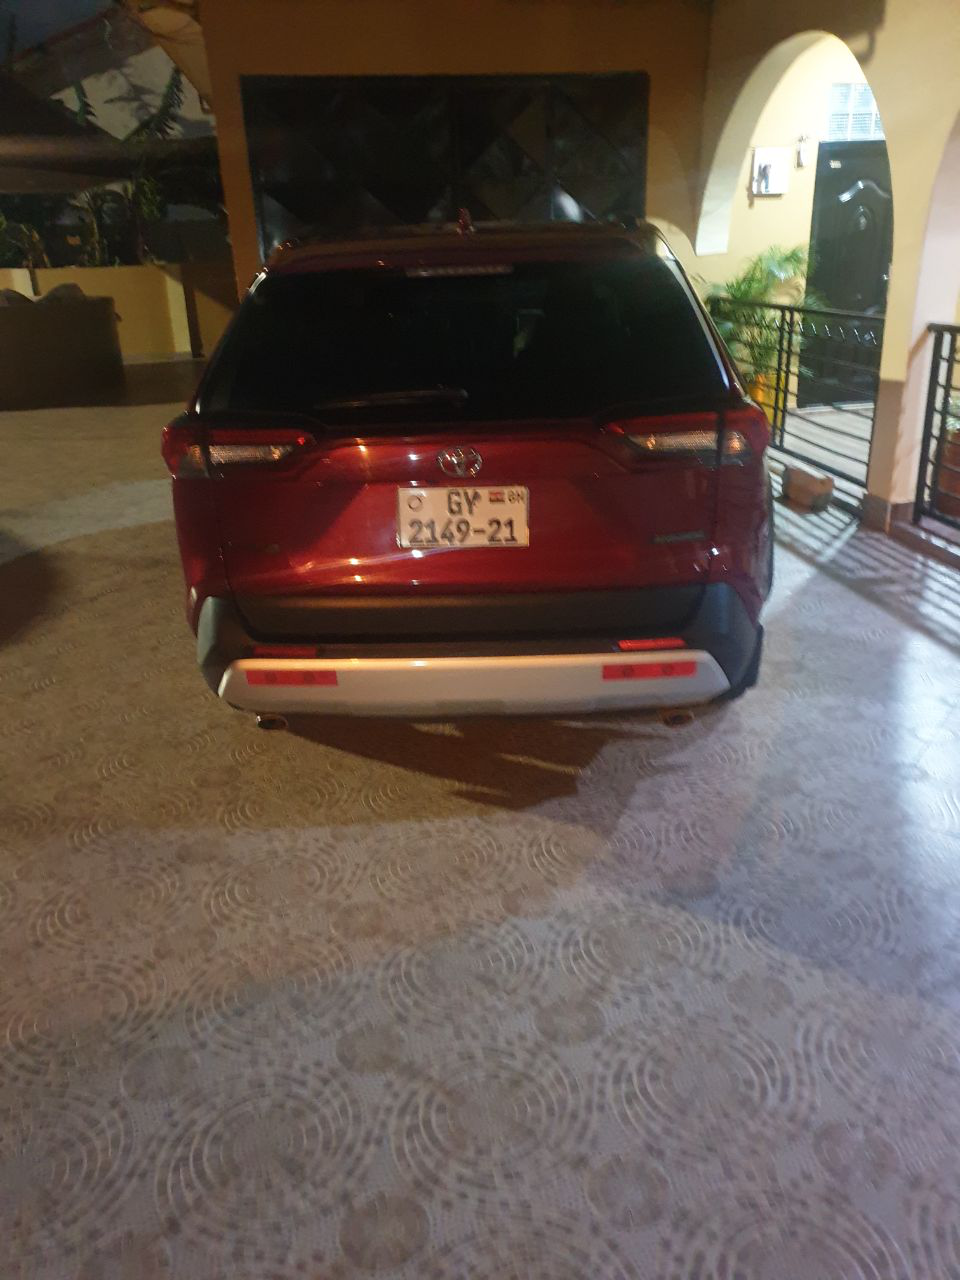

In [ ]:
visualize(im5)

In [ ]:
##Preprocess image appropriately
##Pass single image to model
def preprocess_im(image):
  #Change image sizze
  transform = A.Compose([A.Resize(width=640,height=480)])
  image = transform(image = image)
  return image

In [ ]:
#image1 = preprocess_im(im1)["image"]
#image2 = preprocess_im(im2)["image"]
image3 = preprocess_im(im3)["image"]
image4 = preprocess_im(im4)["image"]
image5 = preprocess_im(im5)["image"]
print(image3.shape)
print(image4.shape)

(480, 640, 3)
(480, 640, 3)


In [ ]:
#visualize(image5)

**Load Saved model**

In [ ]:
##In training loop add functionality where with every validation, the current
##model gets compared with the best model and if performance is better then
##model is replaced.
PTH = os.path.join(m_path,trained_model)
def load_model(PTH):
  ##RETURN LOADED PYTORCH MODEL
  checkpt = torch.load(PTH,map_location=torch.device('cpu'))
  new_model = LPModel(MODEL,4)
  new_model.load_state_dict(checkpt["model_state_dict"])
  epochs = checkpt["epoch"]
  print(f"Number of epochs trained: {epochs}")
  return new_model


In [ ]:
ld_model = load_model(PTH)
ld_model.check_fc()

Number of epochs trained: 5
Linear(in_features=1280, out_features=4, bias=True)


In [ ]:
next(ld_model.parameters()).is_cuda

False

In [ ]:
#convert image to torch
#Feed image to model
#Get prediction
#Draw predictions on image
#Visualize
def predict(image):
  #Convert to torch tensor
  image = torch.from_numpy(image.transpose(2,0,1).astype(np.float32))
  #Add extra dimension
  image = torch.unsqueeze(image,0)
  ##print(image.shape)
  #passing image to model
  output = ld_model(image)
  #Detach grad fn
  output = output.detach().numpy()
  #print(output.shape)
  #return output
  return output


In [ ]:
pred = predict(image3)
pred1 = {"image":image3,"pred":pred}

In [ ]:
pred = predict(image4)
pred2 = {"image":image4,"pred":pred}

In [ ]:
pred = predict(image5)
pred3 = {"image":image5,"pred":pred}

In [ ]:
print(pred1["pred"])
print(pred1["pred"][0][0])
print(pred2["pred"])
print(pred3["pred"])

[[1. 1. 1. 1.]]
1.0
[[1. 1. 1. 1.]]
[[1. 1. 1. 1.]]


In [ ]:
##Function to draw bbox on image and display
def display_pred(pred,ind):
  #Function takes in a dict with "image" and  "pred" keys
  image = Image.fromarray(pred["image"])
  bbox = pred["pred"][ind]

  img_draw = ImageDraw.Draw(image)
  img_draw.rectangle([bbox[0],bbox[1],bbox[2],bbox[3]],outline="red",width=4)
  return image

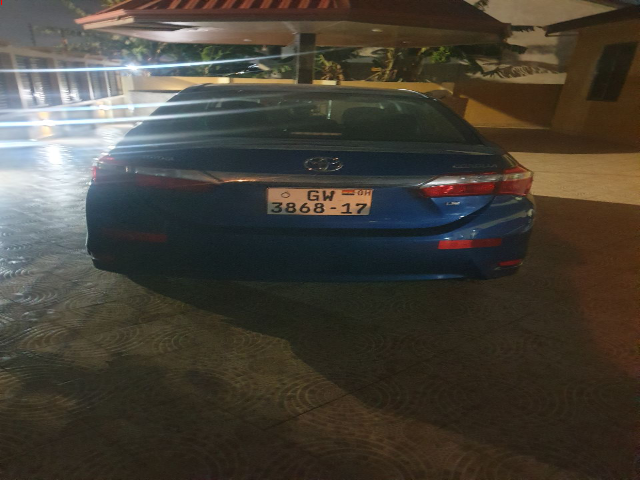

In [ ]:
display_pred(pred1,0)

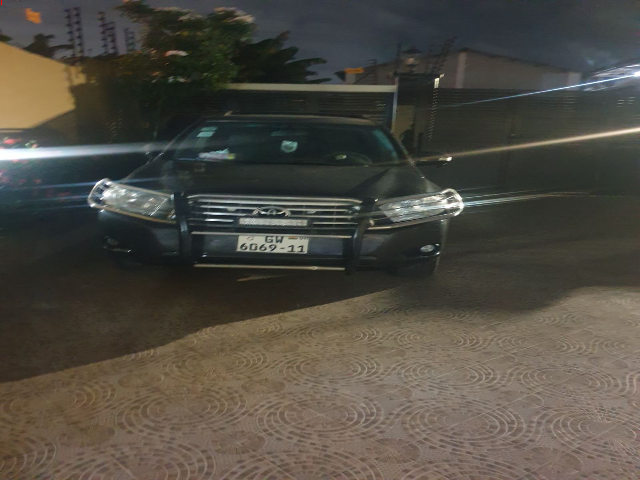

In [ ]:
display_pred(pred2,0)

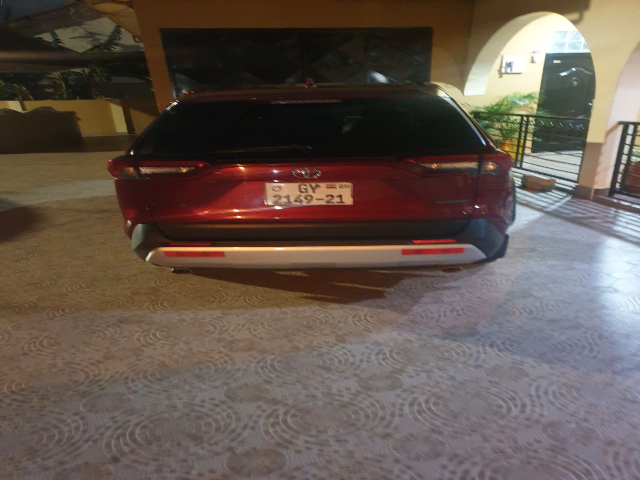

In [ ]:
display_pred(pred3,0)

**Testing on test set**

In [ ]:
test_ds = LPData(adaptor=Adaptor(path ="data/images",df=df,image_size=IMAGE_SIZE),train=False)
test_dl= DataLoader(test_ds,batch_size=20)

In [ ]:
batch = next(iter(test_dl))
images, bboxes = batch["image"],batch["bbox"]
print(images.shape)
print(bbox.shape)

torch.Size([20, 3, 480, 640])
torch.Size([1, 4])


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#Predict
def predict_batch(images,bboxes):
  predictions = ld_model(images)
  print(predictions.shape)
  #print(bboxes.shape)
  predictions=predictions.detach().numpy()
  rscore = r2_score(bboxes.reshape(-1,4),predictions)
  return predictions,rscore

In [ ]:
pred,score = predict_batch(images,bboxes)

In [ ]:
score

In [ ]:
#images[0].numpy()

In [ ]:
ind=1

In [ ]:
preds = {"image":(images[ind].numpy().transpose(1,2,0)*255).astype(np.uint8),
         "pred":pred} 
display_pred(preds,ind)

*NB*: At 50 Epochs, model's predictions is almost always around
area of license plate. It never fully captures it.
Train it for an extra 50 epochs

*NB*: At 100 epochs,results improved, r2 score is at at about 92%. Still cannot identify license plates in uploaded image

In [ ]:
#test on upclose image of lp

In [ ]:
##TO DO:
##Increase Image Size
##Try different backbone
##Generate more data via image augmentation 